## EE-361M Introduction to Data Mining
## Assignment #4
## Due: Thursday, Mar 24, 2016 by 2pm; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 (1+2+1+2+3+3+3=15 points)- Decision Trees 

For this question, we will be using the housing dataset. To make our lives easier, we will be using the pydataset package, which can be installed with 'pip install pydataset'. Pydataset allows us to easily access a lot of datasets. The data can then be accessed as a pandas dataframe as 'df = data('Housing'). See code below.

1. Create price_01 as 1 when price > than the median price and zero otherwise. This will be the class we are now trying to predict.
1. Convert driveway, recroom, fullbase, gashw, airco, and prefarea to numeric dummy variables (1 for yes, zero for no)
2. Split the data into training and testing with a random seed of 42 and keeping 1/3rd of the data for testing
2. Fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to predict price_01 using bedrooms, bathrms, and fullbase on the training data.
4. Use [export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) to visualize the tree. Embed the visualization in your notebook. Comment on the tree - what variables are important? What sequence of decisions (splits) leads to the most likey to get a price_01 of 1 and 0? This problem will require installing [graph viz](http://www.graphviz.org/Download..php).
5. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
6. How can decision trees protect against overfitting? And how does the tree decide on a splitting point?

In [1]:
# install pydataset to get the data (uncomment out next line to do this)
!pip install pydataset

In [2]:
# 1. Create price_01 as 1 when price > than the median price and 0 otherwise.
%matplotlib inline
from pydataset import data
import pandas as pd
import numpy as np

X = data('Housing')
median = np.median(X['price'])
price_01 = pd.Series()
for index, price in enumerate(X['price'], start=1):
    if price > median:
        price_01 = price_01.append(pd.Series([1], index=[index]))
    else:
        price_01 = price_01.append(pd.Series([0], index=[index]))
y = price_01.values

In [3]:
# 2. Convert driveway, recroom, fullbase, gashw, airco, and prefarea to numeric dummy variables (yes=1, no=0)
dummies = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for dummy in dummies:
    for index, value in enumerate(X[dummy], start=1):
        if value == 'yes':
            X.set_value(index, dummy, 1)
        else:
            X.set_value(index, dummy, 0)

In [4]:
# 3. Split the data into training and testing with a random seed of 42 and keeping 1/3rd of the data for testing
from sklearn import cross_validation as cross_val
from sklearn import preprocessing

X_train, X_test, y_train, y_test = cross_val.train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# 4. Fit a decision tree classifier to predict price_01 using bedrooms, bathrms, and fullbase on the training data.
from sklearn import tree

clf = tree.DecisionTreeClassifier()
X_train, X_test = X_train[['bedrooms', 'bathrms', 'fullbase']], X_test[['bedrooms', 'bathrms', 'fullbase']]
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
# 5. Use export_graphviz to visualize the tree. Embed the visualization in your notebook.
#    Comment on the tree - what variables are important? What sequence of decisions (splits) 
#    leads to the most likey to get a price_01 of 1 and 0?
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot, pyparsing, graphviz, StringIO

dot_data = StringIO.StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=['bedrooms', 'bathrooms', 'fullbase'],
                     class_names=['0', '1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_svg("price_tree.svg")
## Saves to file

True

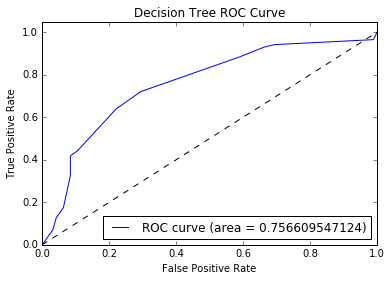

In [8]:
# 6. Plot the ROC curve and display the area under the curve (AUC) score on the test data. For the ROC curve and AUC
#    you will need to get the predicted probabilities (rather than predicting just the class label) using
#    predict_proba() instead of predict().
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test = list()
for yt in y_test:
    if yt == 0: test.append([1, 0])
    else: test.append([0, 1])
test = np.array(test)
n_classes = test.shape[1]

y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %s)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
# 7. How can decision trees protect against overfitting? And how does the tree decide on a splitting point?

Decision trees can protect against overfitting by methods such as pruning, setting a minimum number of samples required at a leaf node, and/or setting the maximum depth of the tree. 

# Question 2 (5+5=10 points)- Bayes Decision Rule

1. Suppose points in $\mathbb{R}^2$ are being obtained 
from two classes, C1 and C2, both of which are normally distributed with means at 
(2,0) and (0,2) respectively.  The covariance matrix for both classes is the (2x2) identity matrix.
If the priors of C1 and C2 are 1/5 and 4/5 respectively, what is the 
ideal (i.e. Bayes Optimal) decision boundary (derive the equation for this boundary)?
2. Suppose the cost of misclassifying an input actually belonging to C1 is 
twice as  expensive as  misclassifying
an input belonging to C2. Correct classification does not incur any cost.
If the objective is to minimize the expected cost rather than
expected misclassification rate, what would be the best decision boundary?
(obtain the equation that describes this boundary).

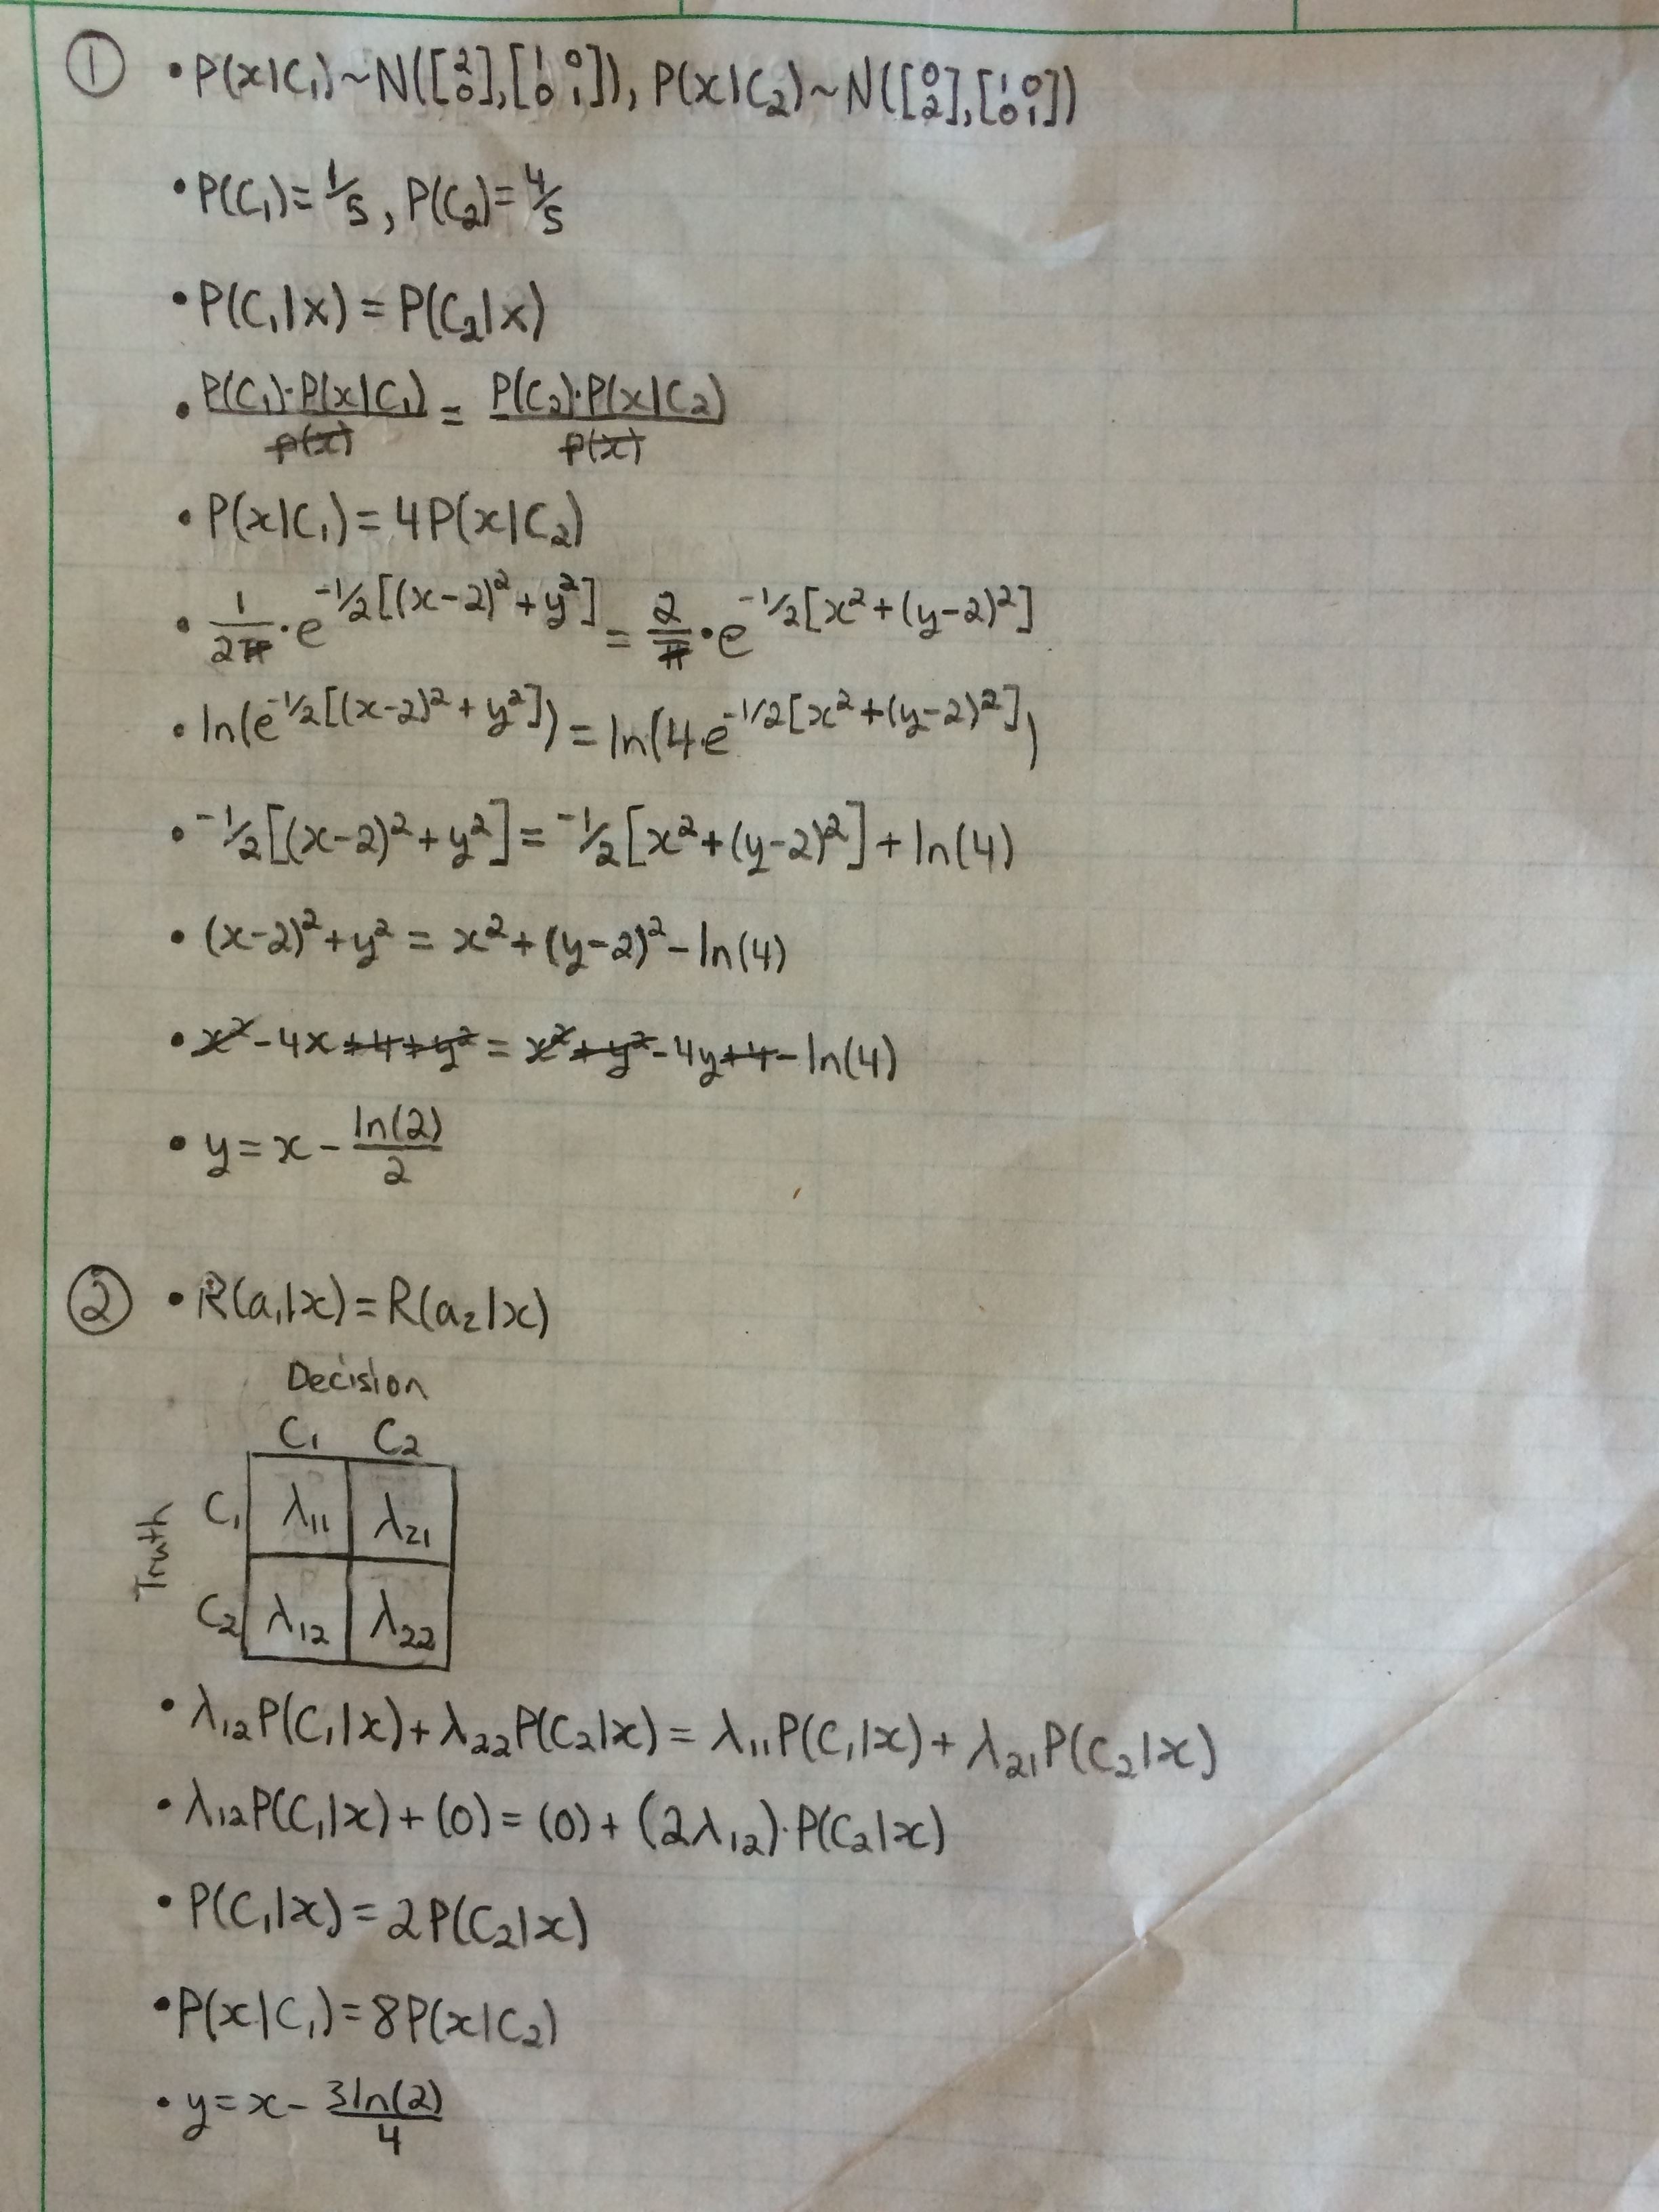

In [10]:
from IPython.display import Image
Image(filename='hw4q2.jpg')

# Question 3 (1+3+1+3+2+2+3=15 points) - Naive Bayes, LDA & QDA

For this problem, we will be using the California School dataset, which can be imported using pydataset (See code below).

1. Create a binary variable, test_score_01, that contains a 1 if testscr contains a value above its median, and a 0 otherwise.
2. Explore the data graphically in order to investigate the association between test_score_01 and the other features. Which of the other features seem most likely to be useful in predicting total_score_01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
3. Split the data into training and testing with random state of 42 and keeping 1/3rd of the data for testing. X should include ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc'] as fectures. Your dependent variable, y, is test_score_01.
4. Perform Naive Bayes (see sklearn) on the training data. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
5. Repeat the same steps as in 4 with LDA. Scikit has code for both LDA and QDA.
6. Repeat the same steps as in 4 with QDA.
7. Explain the differences between Naive Bayes, LDA, and QDA. Why do you think the model with the best AUC performed the best?

In [11]:
# 1. Create a binary variable, test_score_01, that = 1 if testscr contains a value above its median, else it = 0
df = data('Caschool')
median = np.median(df['testscr'])
test_score_01 = pd.Series()
for index, price in enumerate(df['testscr'], start=1):
    if price > median:
        test_score_01 = test_score_01.append(pd.Series([1], index=[index]))
    else:
        test_score_01 = test_score_01.append(pd.Series([0], index=[index]))

In [12]:
# 2. Explore the data graphically in order to investigate the association between test_score_01 and the other features.
#    Which of the other features seem most likely to be useful in predicting total_score_01? Scatterplots and boxplots
#    may be useful tools to answer this question. Describe your findings.

In [13]:
# 3. Split the data into training and testing with random state of 42 and keeping 1/3rd of the data for testing. X
#    should include ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc'] as features. Your dependent
#    variable, y, is test_score_01.
X = df[['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc']]
y = test_score_01.values
X_train, X_test, y_train, y_test = cross_val.train_test_split(X, y, test_size=0.33, random_state=42)
test = list()
for yt in y_test:
    if yt == 0: test.append([1, 0])
    else: test.append([0, 1])
test = np.array(test)
n_classes = test.shape[1]

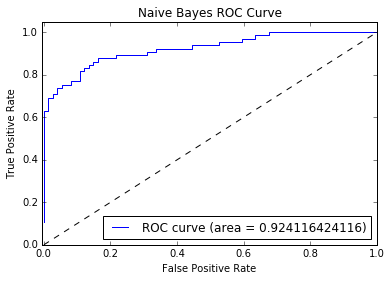

In [14]:
# 4. Perform Naive Bayes (see sklearn) on the training data. Plot the ROC curve and display the area under the curve
#    score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than
#    predicting just the class label) using predict_proba() instead of predict().
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_score = gnb.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %s)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

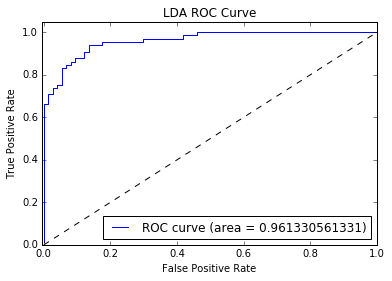

In [15]:
# 5. Repeat the same steps as in 4 with LDA. Scikit has code for both LDA and QDA.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train)
y_score = lda.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %s)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

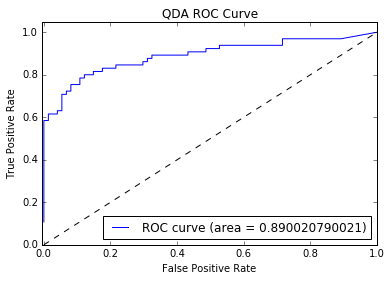

In [16]:
# 6. Repeat the same steps as in 4 with QDA.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda.fit(X_train, y_train)
y_score = qda.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %s)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# 7. Explain the differences between Naive Bayes, LDA, and QDA. Why do you think the model with the best AUC
#    performed the best?

All 3, Naive Bayes, LDA, and QDA are generative classifiers which estimate posterior probabilities, but only Naive Bayes and LDA are linear classifiers. The main difference between Naive Bayes and LDA is that LDA assumes equal covariances among class-variables and a multivariate Gaussian distribution for the class-conditional density while Naive Bayes assumes class conditionals are independent and therefore treats the class-conditional density as a product of univariate Gaussian distributions. Because Naive Bayes assumes no correlation between variables within a class, the LDA is therefore more flexible. QDA, however, is even more flexible because, as the name suggests, it can learn quadratic boundaries instead of just linear boundaries. This is because, unlike LDA, QDA allows for class-specific covariances. The model with the best AUC for our data was the LDA. This is most likely because the covariances among class-variables were very close or almost equal to each other. Naive Bayes most likely suffered because the in-class variables were likely not as indepedent as assumed and QDA most likley suffered because of estimating covariances separately, allowing too large of differences between variables.

# Question 4 (3+2+5=10 points) - Bayesian Network

In the Bayesian network shown below, B stands for `Battery', F for 'Fuel', G for 'Gauge', and S for 'Start'. Compute the following probabilities:

1. P(B = bad, F = not empty, G = empty, S = no)
2. P(B = good, F = empty, G = empty, S = no)
3. Given that the fuel is empty, compute the probability that the car will start.

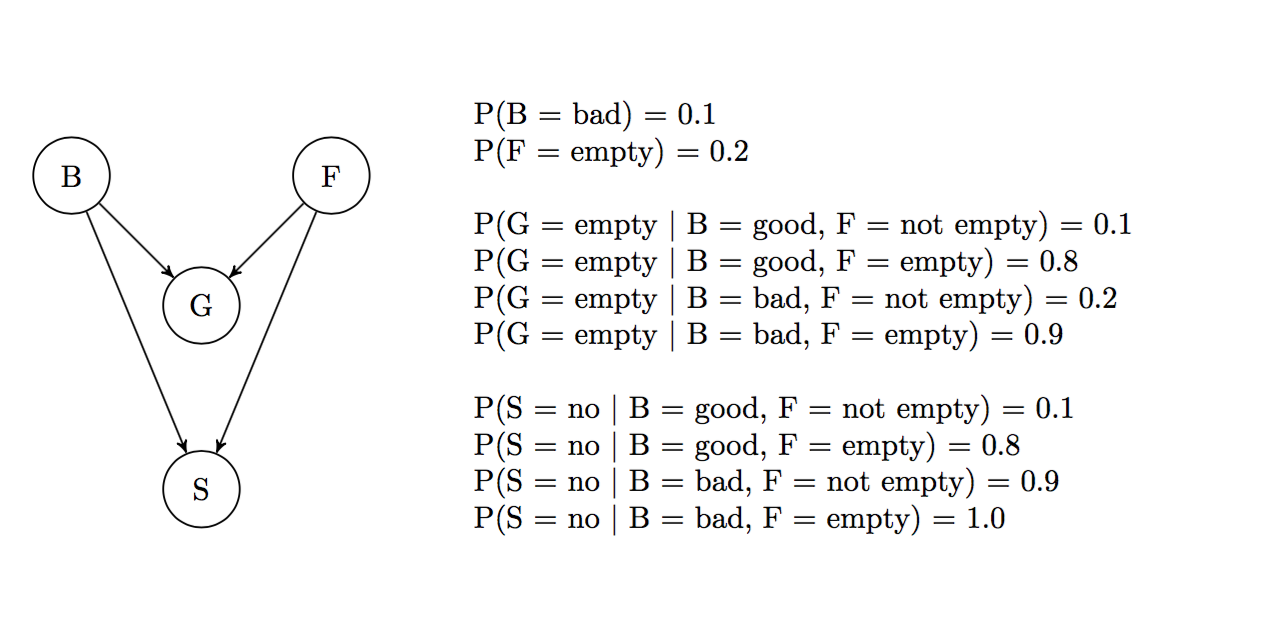

In [18]:
Image(filename='bbn.png')

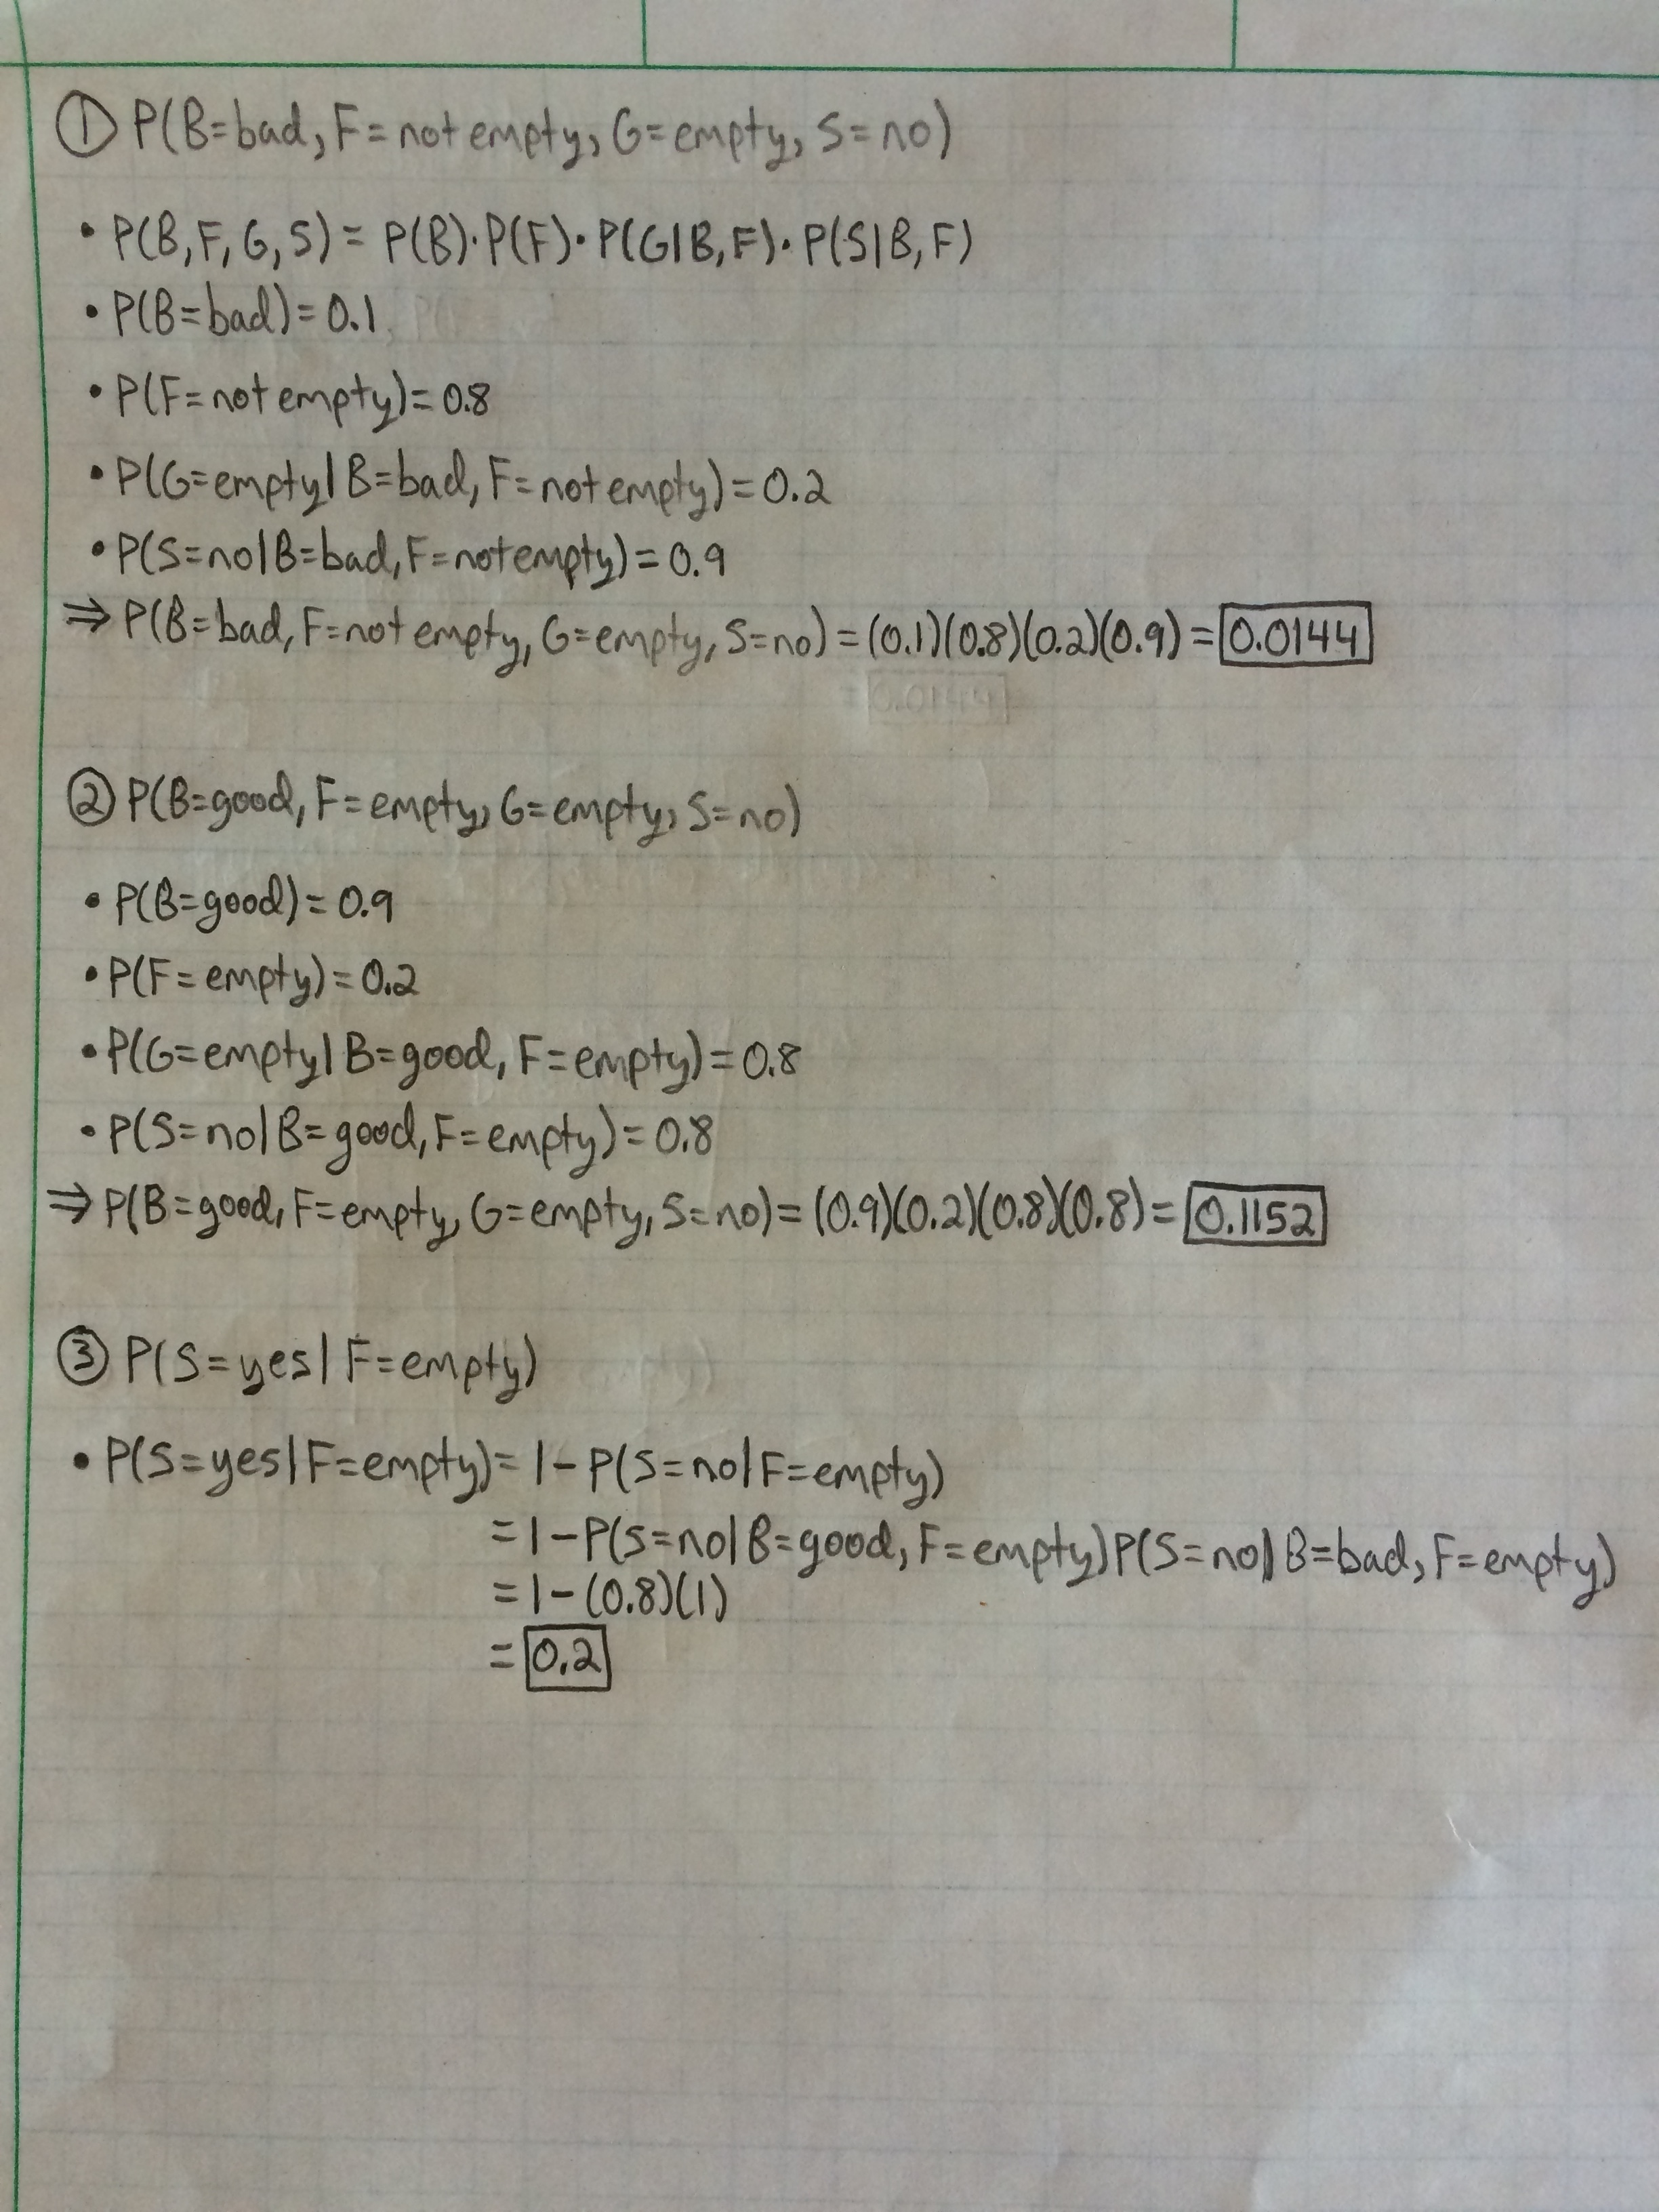

In [19]:
Image(filename="hw4q4.jpg")